In [25]:
import pandas as pd

# Assuming your dataset is in a CSV file named 'tennis.csv'
df = pd.read_csv("C:/Users/jaswa/OneDrive/Desktop/733/Data set Lab 3/tennis.csv")

# Display the first few rows of the dataset to get an overview
df.head()

# Get the shape of the dataframe (number of rows and columns)
df.shape



(14, 5)

In [32]:
df.head(15)

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,No,No
1,Sunny,Hot,High,Yes,No
2,Overcast,Hot,High,No,Yes
3,Rainy,Mild,High,No,Yes
4,Rainy,Cool,Normal,No,Yes
5,Rainy,Cool,Normal,Yes,No
6,Overcast,Cool,Normal,Yes,Yes
7,Sunny,Mild,High,No,No
8,Sunny,Cool,Normal,No,Yes
9,Rainy,Mild,Normal,No,Yes


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     object
 4   Play         14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


# Task 2b

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
df = pd.read_csv("C:/Users/jaswa/OneDrive/Desktop/733/Data set Lab 3/tennis.csv")

# Define the features and target variable
X = df[['Outlook', 'Temperature', 'Humidity', 'Windy']]
y = df['Play']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier using entropy (information gain)
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 1.0
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [38]:
import pandas as pd
import math

def entropy(series):
    """Calculate the entropy of a target variable."""
    counts = series.value_counts()
    probabilities = counts / len(series)
    return -sum(probabilities * probabilities.apply(math.log2))

def information_gain(data, input_attribute, output_attribute):
    """Calculate the information gain of a pair of input and output attributes."""
    total_entropy = entropy(data[output_attribute])
    weighted_avg_entropy = 0

    for value in data[input_attribute].unique():
        subset = data[data[input_attribute] == value]
        weighted_avg_entropy += (len(subset) / len(data)) * entropy(subset[output_attribute])

    return total_entropy - weighted_avg_entropy

# Example usage
df = pd.read_csv("C:/Users/jaswa/OneDrive/Desktop/733/Data set Lab 3/tennis.csv")

input_attribute = 'Outlook'
output_attribute = 'Play'

gain = information_gain(df, input_attribute, output_attribute)
print(f'Information Gain for {input_attribute}: {gain}')


Information Gain for Outlook: 0.24674981977443933


In [39]:
import pandas as pd
import math

def entropy(series):
    """Calculate the entropy of a target variable."""
    counts = series.value_counts()
    probabilities = counts / len(series)
    return -sum(probabilities * probabilities.apply(math.log2))

def information_gain(data, input_attribute, output_attribute):
    """Calculate the information gain of a pair of input and output attributes."""
    total_entropy = entropy(data[output_attribute])
    weighted_avg_entropy = 0

    for value in data[input_attribute].unique():
        subset = data[data[input_attribute] == value]
        weighted_avg_entropy += (len(subset) / len(data)) * entropy(subset[output_attribute])

    return total_entropy - weighted_avg_entropy

# Load your dataset
df = pd.read_csv("C:/Users/jaswa/OneDrive/Desktop/733/Data set Lab 3/tennis.csv")

# Define the input and output attributes
input_attributes = ['Outlook', 'Temperature', 'Humidity', 'Windy']
output_attribute = 'Play'

# Compute Information Gain for each input attribute
for input_attribute in input_attributes:
    gain = information_gain(df, input_attribute, output_attribute)
    print(f'Information Gain for {input_attribute}: {gain}')


Information Gain for Outlook: 0.24674981977443933
Information Gain for Temperature: 0.02922256565895487
Information Gain for Humidity: 0.15183550136234159
Information Gain for Windy: 0.04812703040826949


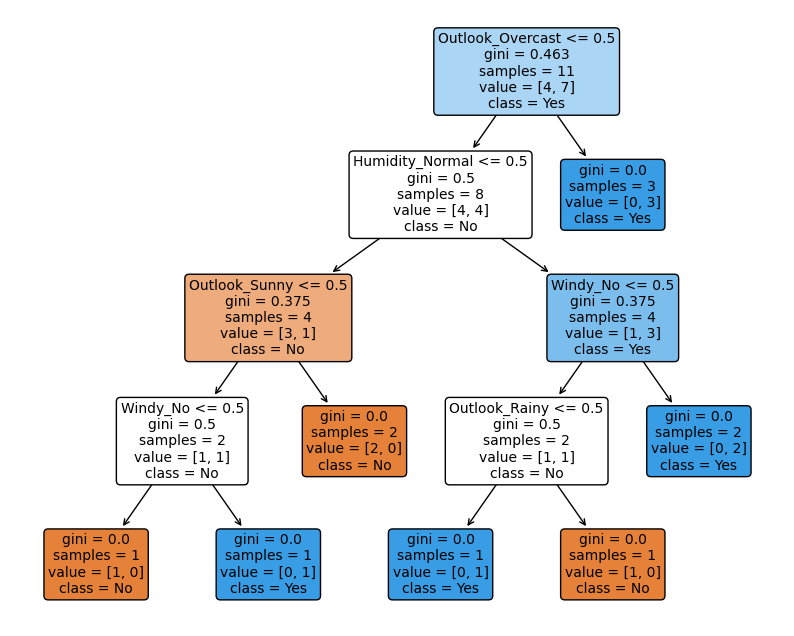

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'clf' is your trained decision tree classifier
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=list(X.columns), class_names=list(y.unique()), filled=True, rounded=True, fontsize=10)
plt.show()


# TASK 3b

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

true_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
predicted_labels = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision
precision = precision_score(true_labels, predicted_labels)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)

# Calculate F1-score
f1 = f1_score(true_labels, predicted_labels)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8
F1-score: 0.7272727272727272


In [2]:
from sklearn.metrics import confusion_matrix

true_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
predicted_labels = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]

# Generate confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Extract values from confusion matrix
true_negatives, false_positives, false_negatives, true_positives = confusion_mat.ravel()

# Calculate accuracy
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

# Calculate precision
precision = true_positives / (true_positives + false_positives)

# Calculate recall
recall = true_positives / (true_positives + false_negatives)

# Calculate true positive rate (sensitivity or recall)
true_positive_rate = recall

# Calculate false positive rate
false_positive_rate = false_positives / (false_positives + true_negatives)

# Print the results
print("Contingency Table (Confusion Matrix):")
print(confusion_mat)
print(f"\nAccuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (True Positive Rate): {recall}")
print(f"False Positive Rate: {false_positive_rate}")


Contingency Table (Confusion Matrix):
[[3 2]
 [1 4]]

Accuracy: 0.7
Precision: 0.6666666666666666
Recall (True Positive Rate): 0.8
False Positive Rate: 0.4


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_performance(true_labels, predicted_labels):
    # Generate confusion matrix
    confusion_mat = confusion_matrix(true_labels, predicted_labels)

    # Extract values from confusion matrix
    true_negatives, false_positives, false_negatives, true_positives = confusion_mat.ravel()

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Calculate precision
    precision = precision_score(true_labels, predicted_labels)

    # Calculate recall
    recall = recall_score(true_labels, predicted_labels)

    # Calculate F1-score
    f1 = f1_score(true_labels, predicted_labels)

    # Calculate specificity
    specificity = true_negatives / (true_negatives + false_positives)

    # Calculate negative predictive value
    negative_predictive_value = true_negatives / (true_negatives + false_negatives)

    # Calculate true positive rate (sensitivity or recall)
    true_positive_rate = recall

    # Calculate false positive rate
    false_positive_rate = false_positives / (false_positives + true_negatives)

    # Print metrics
    print("Metrics:")
    print(f"True Positives: {true_positives}")
    print(f"True Negatives: {true_negatives}")
    print(f"False Positives: {false_positives}")
    print(f"False Negatives: {false_negatives}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall (True Positive Rate): {recall}")
    print(f"F1 Score: {f1}")
    print(f"Specificity: {specificity}")
    print(f"Negative Predictive Value: {negative_predictive_value}")
    print(f"False Positive Rate: {false_positive_rate}")

# Example usage
true_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
predicted_labels = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]

evaluate_performance(true_labels, predicted_labels)

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Create a simple decision tree model (replace with your own model if necessary)
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

# Visualize the decision tree
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=["Feature 1", "Feature 2"],  
                         class_names=["Class 0", "Class 1"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")



Metrics:
True Positives: 4
True Negatives: 3
False Positives: 2
False Negatives: 1
Accuracy: 0.7
Precision: 0.6666666666666666
Recall (True Positive Rate): 0.8
F1 Score: 0.7272727272727272
Specificity: 0.6
Negative Predictive Value: 0.75
False Positive Rate: 0.4


ModuleNotFoundError: No module named 'graphviz'

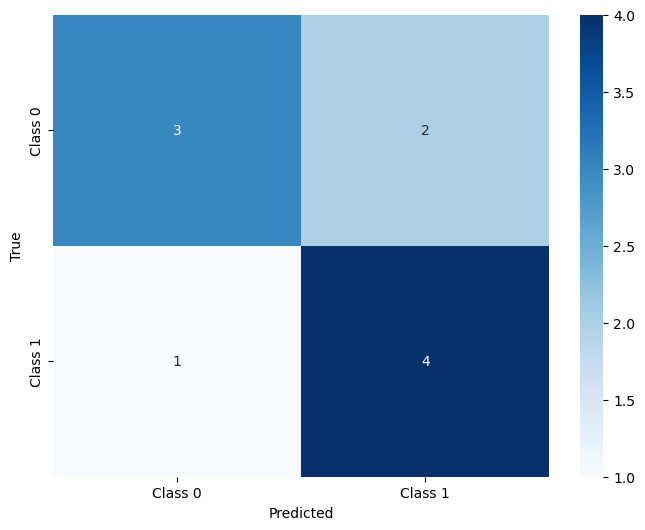

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_labels, predicted_labels, classes):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Example usage
true_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
predicted_labels = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]
class_names = ['Class 0', 'Class 1']

plot_confusion_matrix(true_labels, predicted_labels, class_names)



Contingency Table (Confusion Matrix):
True Label/Predicted Label	| Predicted True	| Predicted False
Actual True			| 4		| 1
Actual False			| 2		| 3

Metrics:
True Positives: 4
True Negatives: 3
False Positives: 2
False Negatives: 1
Accuracy: 0.7
Precision: 0.6666666666666666
Recall (True Positive Rate): 0.8
F1 Score: 0.7272727272727272
Specificity: 0.6
Negative Predictive Value: 0.75
False Positive Rate: 0.4
True Positive Rate (Sensitivity): 0.8


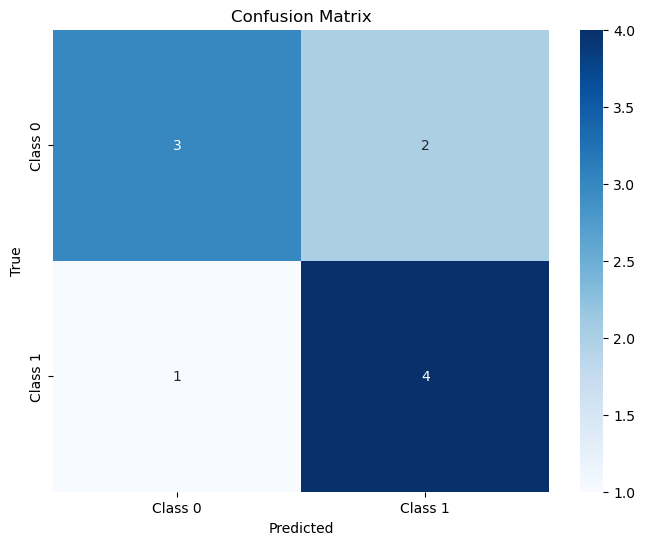

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_performance(true_labels, predicted_labels):
    # Generate confusion matrix
    confusion_mat = confusion_matrix(true_labels, predicted_labels)

    # Extract values from confusion matrix
    true_negatives, false_positives, false_negatives, true_positives = confusion_mat.ravel()

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Calculate precision
    precision = precision_score(true_labels, predicted_labels)

    # Calculate recall
    recall = recall_score(true_labels, predicted_labels)

    # Calculate F1-score
    f1 = f1_score(true_labels, predicted_labels)

    # Calculate specificity
    specificity = true_negatives / (true_negatives + false_positives)

    # Calculate negative predictive value
    negative_predictive_value = true_negatives / (true_negatives + false_negatives)

    # Calculate true positive rate (sensitivity or recall)
    true_positive_rate = true_positives / (true_positives + false_negatives)

    # Calculate false positive rate
    false_positive_rate = false_positives / (false_positives + true_negatives)

    # Display contingency table
    print("Contingency Table (Confusion Matrix):")
    print("True Label/Predicted Label\t| Predicted True\t| Predicted False")
    print(f"Actual True\t\t\t| {true_positives}\t\t| {false_negatives}")
    print(f"Actual False\t\t\t| {false_positives}\t\t| {true_negatives}\n")

    # Print metrics
    print("Metrics:")
    print(f"True Positives: {true_positives}")
    print(f"True Negatives: {true_negatives}")
    print(f"False Positives: {false_positives}")
    print(f"False Negatives: {false_negatives}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall (True Positive Rate): {recall}")
    print(f"F1 Score: {f1}")
    print(f"Specificity: {specificity}")
    print(f"Negative Predictive Value: {negative_predictive_value}")
    print(f"False Positive Rate: {false_positive_rate}")
    print(f"True Positive Rate (Sensitivity): {true_positive_rate}")

    # Visualize the confusion matrix
    class_names = ['Class 0', 'Class 1']
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
true_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
predicted_labels = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]

evaluate_performance(true_labels, predicted_labels)


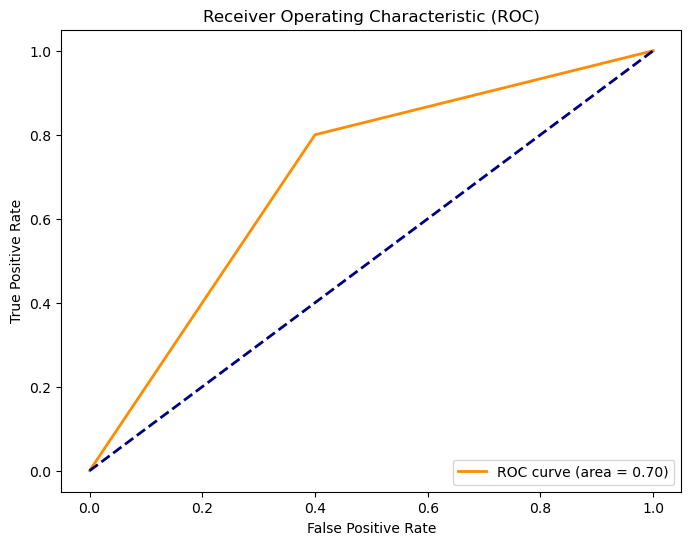

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(true_labels, predicted_labels):
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Example usage
true_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
predicted_labels = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]

plot_roc_curve(true_labels, predicted_labels)
